In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
rd=pd.read_csv("Electric_Vehicle_Population_Data.csv")
rd.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23.0,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,5.303508e+10
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26.0,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJXCAE28L,King,Seattle,WA,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36.0,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,SADHC2S1XK,Thurston,Olympia,WA,98503.0,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2.0,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21.0,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,5.306104e+10


In [4]:
rd.shape

(138779, 17)

In [5]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138779 entries, 0 to 138778
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         138779 non-null  object 
 1   County                                             138776 non-null  object 
 2   City                                               138776 non-null  object 
 3   State                                              138779 non-null  object 
 4   Postal Code                                        138776 non-null  float64
 5   Model Year                                         138779 non-null  int64  
 6   Make                                               138779 non-null  object 
 7   Model                                              138493 non-null  object 
 8   Electric Vehicle Type                              138779 non-null  object

In [6]:
rd.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,138776.000000,138779.000000,138779.000000,138779.000000,138464.000000,1.387790e+05,1.387760e+05
mean,98172.902404,2019.772098,72.305760,1405.497770,29.433167,2.079563e+08,5.297149e+10
std,2411.731323,3.013002,97.772731,9547.392794,14.796927,8.455916e+07,1.647491e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.647984e+08,5.303301e+10
50%,98122.000000,2021.000000,21.000000,0.000000,33.000000,2.086079e+08,5.303303e+10
75%,98370.000000,2022.000000,126.000000,0.000000,43.000000,2.343578e+08,5.305307e+10
max,99701.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
rd.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
#observing unique values for variable data types
for col in ['County','City','Make','Electric Vehicle Type','Electric Utility']:print(col,':',rd[col].unique())

County : ['Kitsap' 'King' 'Thurston' 'Snohomish' 'Yakima' 'Spokane' 'Grant'
 'Walla Walla' 'Chelan' 'Okanogan' 'Island' 'Kittitas' 'Skagit' 'Douglas'
 'Whitman' 'Stevens' 'Clark' 'Cowlitz' 'Pierce' 'Whatcom' 'Benton'
 'Jefferson' 'Clallam' 'Lewis' 'Wahkiakum' 'San Juan' 'Grays Harbor'
 'Skamania' 'Franklin' 'Pacific' 'Mason' 'Ulster' 'Pend Oreille' 'Marin'
 'Adams' nan 'Asotin' 'Contra Costa' 'Klickitat' 'Riverside' 'Lincoln'
 'Anne Arundel' 'Columbia' 'Sacramento' 'Wichita' 'Saratoga' 'Berkeley'
 'Hawaii' 'Ferry' 'Lake' 'El Paso' 'Salt Lake' 'Plaquemines' 'Galveston'
 'Gwinnett' 'Richmond' 'Cook' 'Rockdale' 'Hillsborough' 'Bell' 'Maricopa'
 'Bexar' 'Alexandria' 'Chesapeake' 'Platte' 'District of Columbia'
 'Camden' 'Los Angeles' 'Howard' 'Stafford' 'Broward' 'Santa Clara'
 'San Diego' 'Virginia Beach' "Prince George's" 'New London' 'Ray'
 'Solano' 'Multnomah' 'Fairfax' 'Burlington' 'Larimer' 'Honolulu' 'Kern'
 'Sarpy' 'Nueces' 'Harnett' 'Tarrant' 'Orange' 'Rockingham' 'Middlesex'
 'Do

In [9]:

## Double checking the percentage of empty entries column wise
rd.isnull().sum() / rd.shape[0] * 100.00

VIN (1-10)                                           0.000000
County                                               0.002162
City                                                 0.002162
State                                                0.000000
Postal Code                                          0.002162
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.206083
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.226980
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004323
Electric Utility                                     0.002162
2020 Cen

In [10]:
rd.loc[rd['Base MSRP'] == '69900']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [11]:
rd.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23.0,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,5.303508e+10
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26.0,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJXCAE28L,King,Seattle,WA,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36.0,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,SADHC2S1XK,Thurston,Olympia,WA,98503.0,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2.0,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21.0,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,5.306104e+10


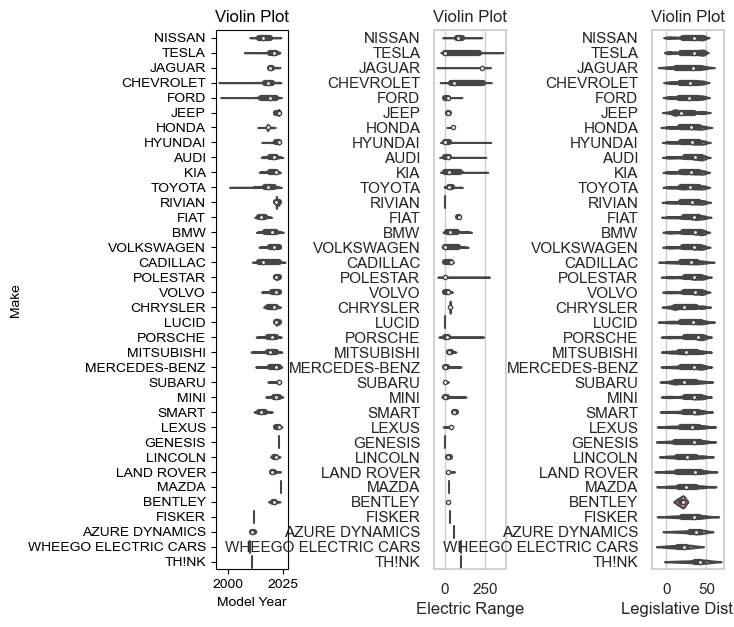

In [12]:
#BEHAVIORAL AND PSYCHOGRAPHIC ANALYSIS
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Model Year','Electric Range','Legislative District']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=2,wspace=2)
  sns.violinplot(x= cols, y = 'Make', data=rd)
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

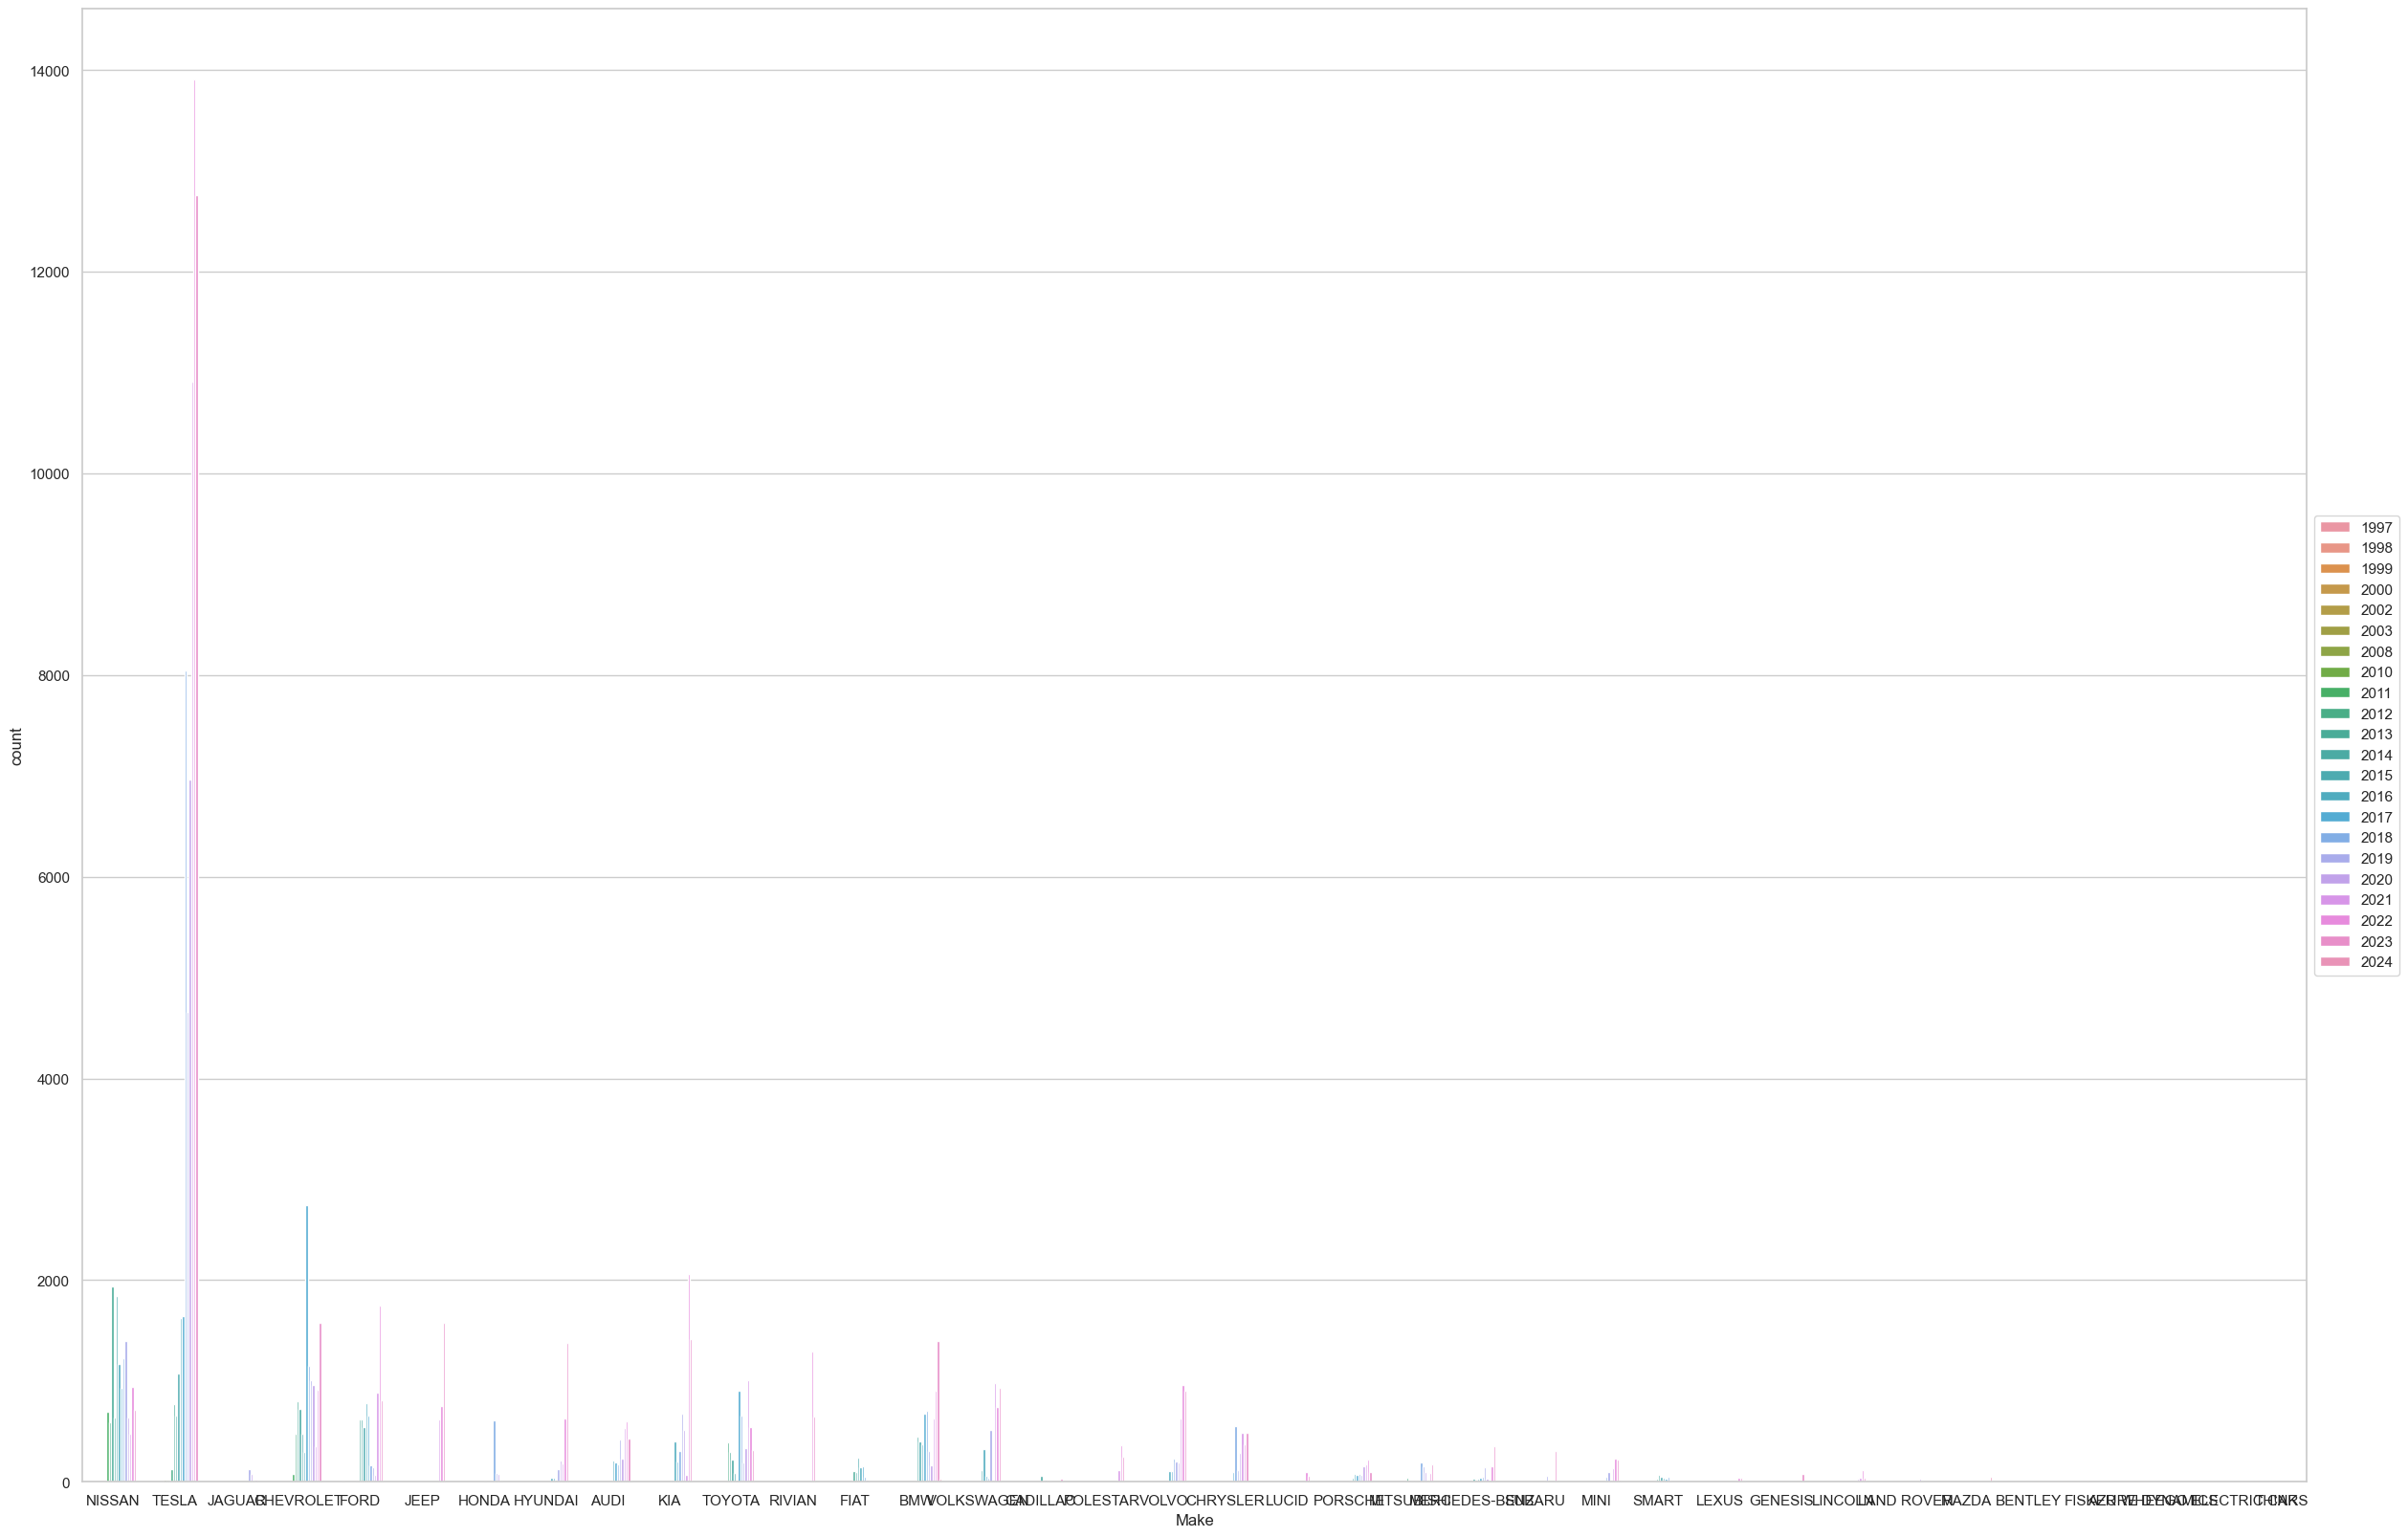

In [13]:
plt.figure(figsize=(30,20))
sns.countplot(x='Make',data=rd,hue='Model Year')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

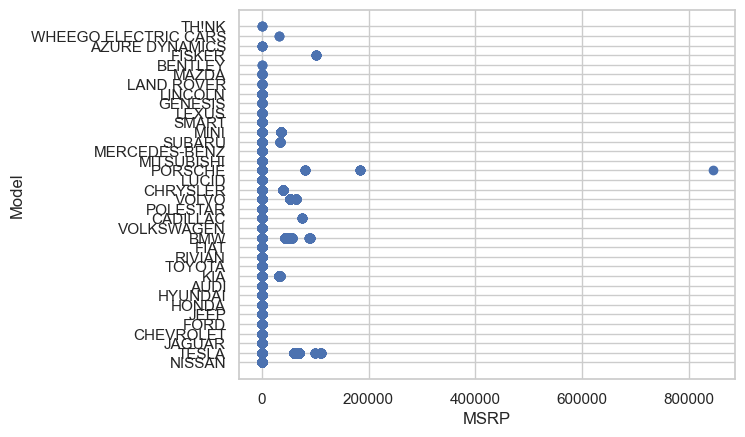

In [14]:
plt.xlabel('MSRP')
plt.ylabel('Model')
plt.scatter(rd['Base MSRP'],rd['Make'])

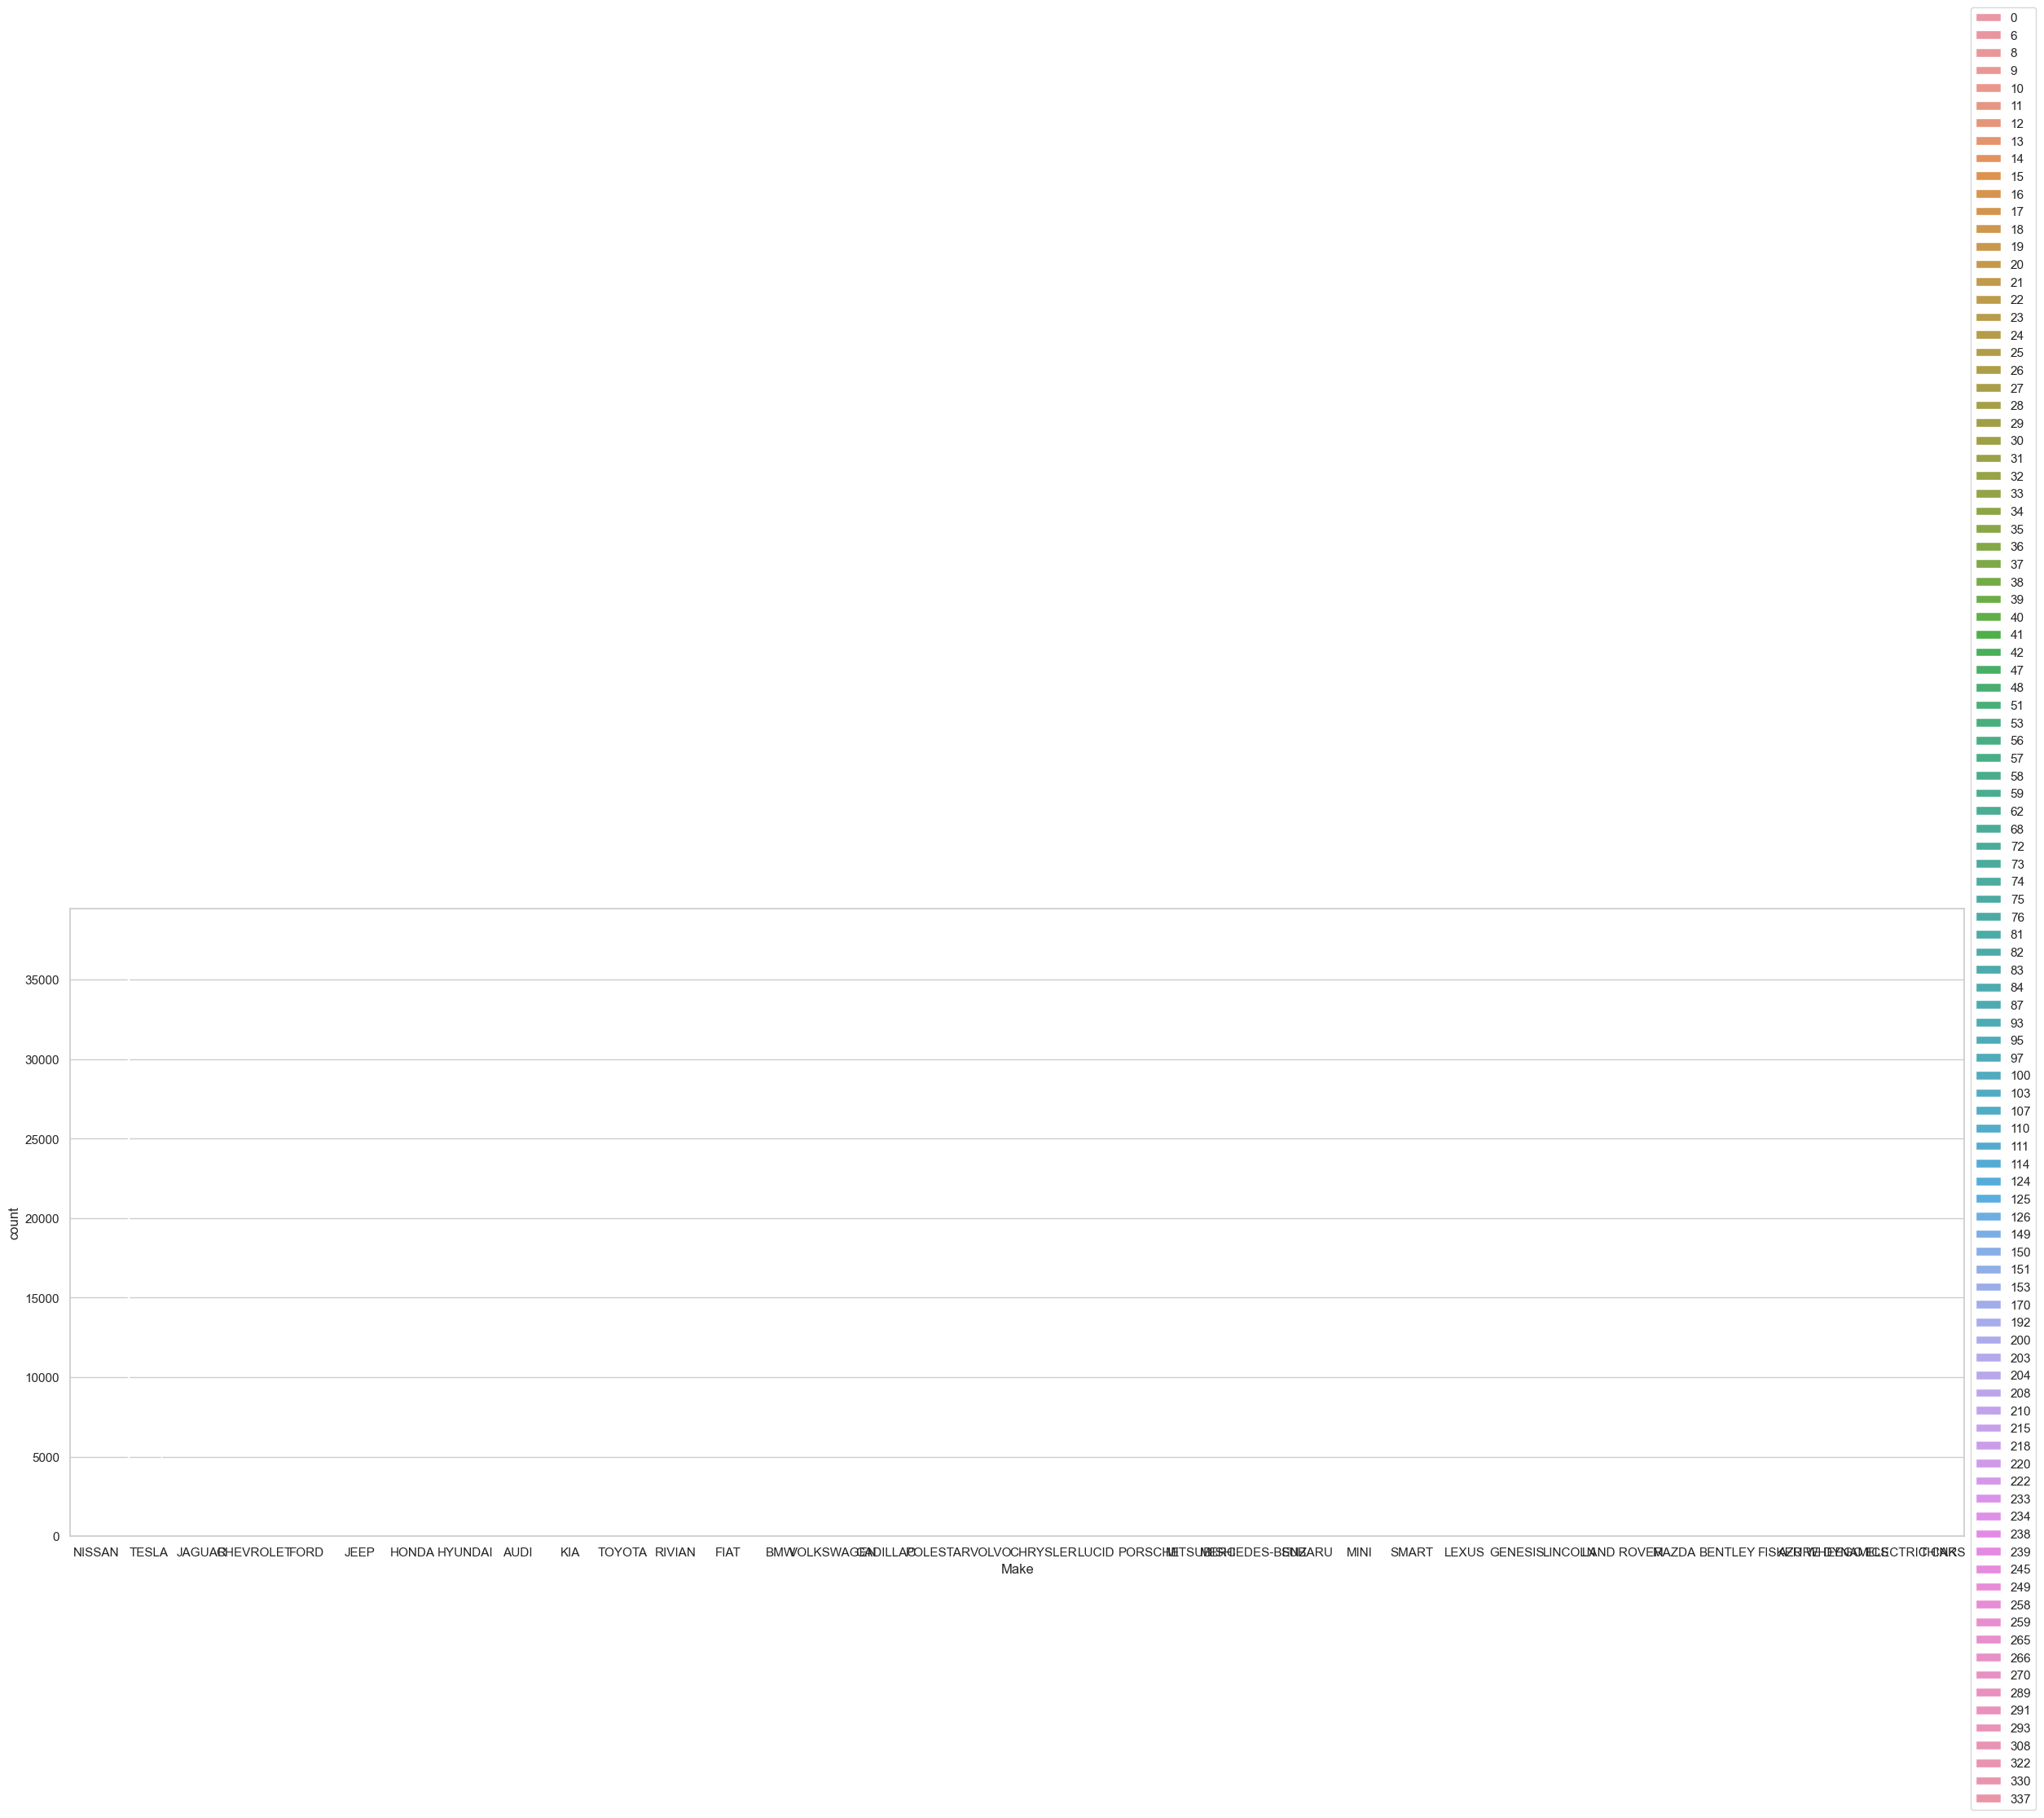

In [15]:
plt.figure(figsize=(30,10))
sns.countplot(x='Make',data=rd,hue='Electric Range')
plt.legend(loc='center left',bbox_to_anchor=(1,1))

C:\Users\paart\AppData\Local\Temp\ipykernel_15068\56410949.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rd[x], bins = 20)
C:\Users\paart\AppData\Local\Temp\ipykernel_15068\56410949.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rd[x], bins = 20)
C:\Users\paart\AppData\Local\Temp\ipyk

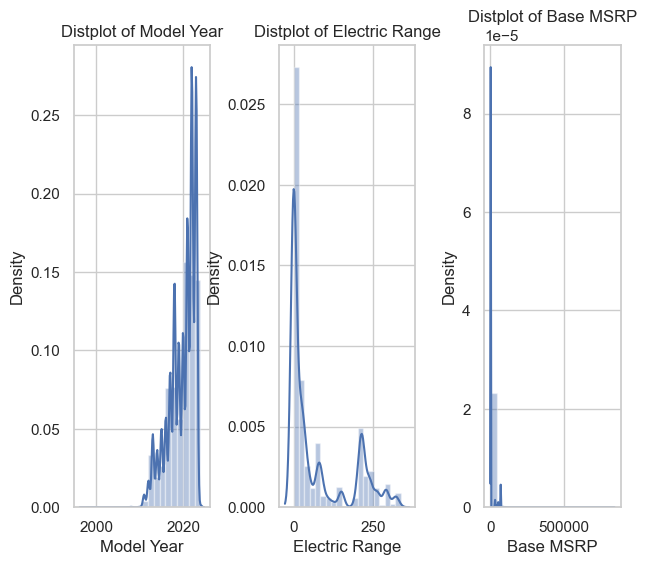

In [16]:
#DEMOGRAPHIC ANALYSIS
# Plotting for int64 dtype columns
plt.figure(1, figsize=(15,6))
n=0
for x in ['Model Year', 'Electric Range' ,'Base MSRP']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(rd[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

C:\Users\paart\AppData\Local\Temp\ipykernel_15068\2720952988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rd.corr(),annot=True)


<Axes: >

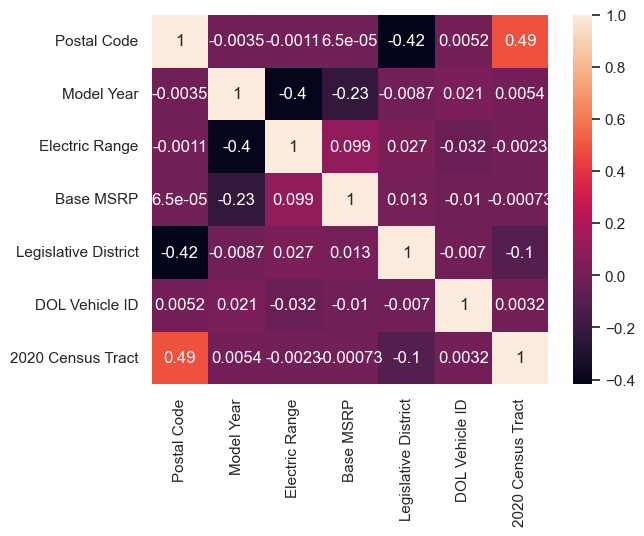

In [17]:
sns.heatmap(rd.corr(),annot=True)

In [18]:
data=pd.read_csv('Market-Segmentation-for-Electric-Vehicles-in-India_main_EVStats.csv')


In [19]:
data.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


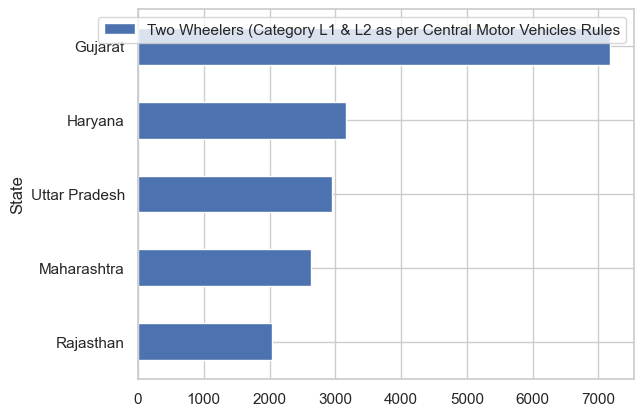

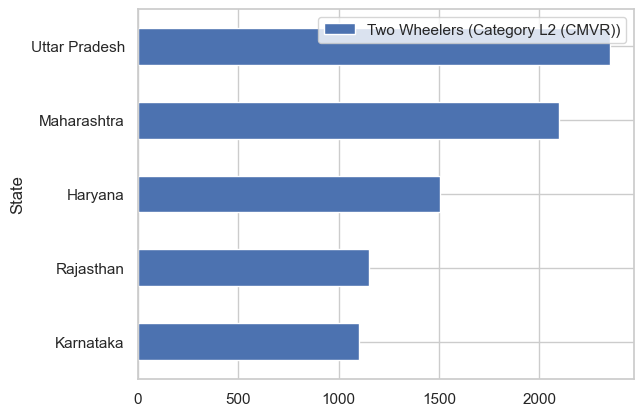

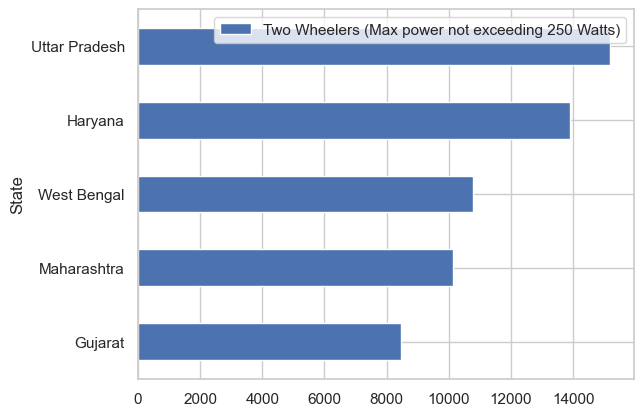

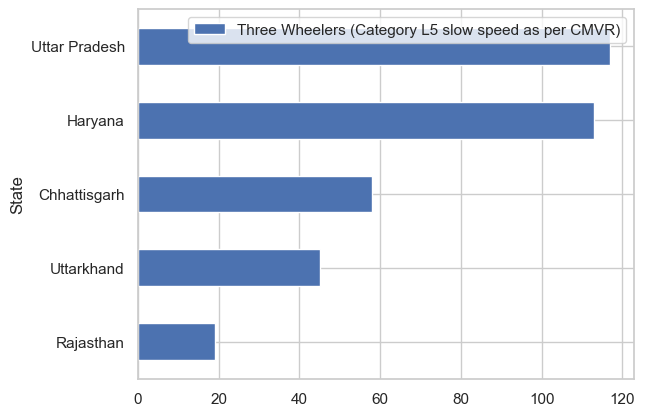

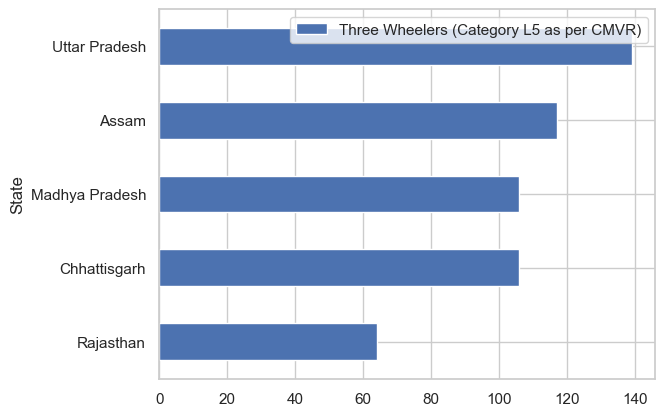

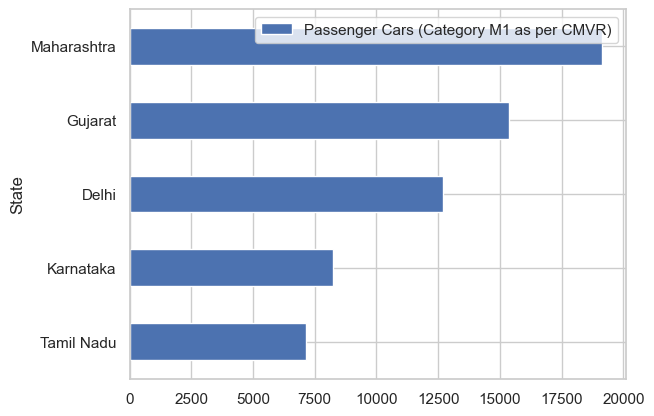

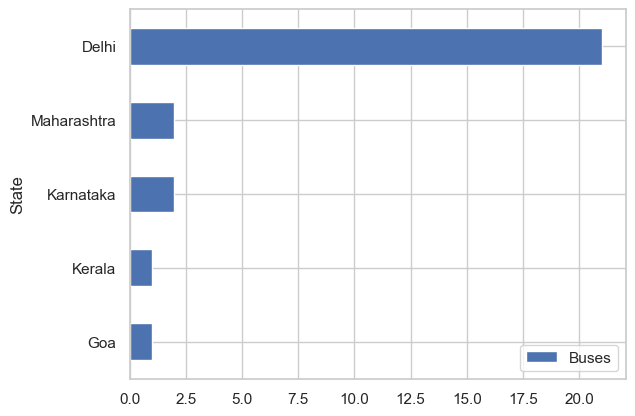

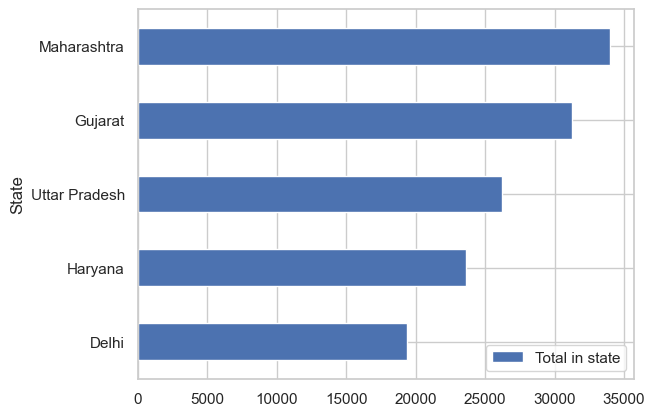

In [20]:
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
    ax = data.sort_values(y, ascending=True).tail(5).plot.barh(x='State', y=y)

In [21]:
import scipy 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster.hierarchy import fcluster 
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist 

from pylab import rcParams

import sklearn 
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


Text(0, 0.5, 'Electric Range')

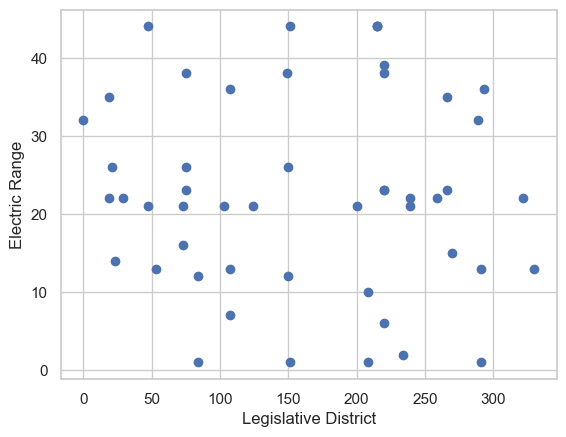

In [30]:
plt.scatter(rd['Electric Range'][0:50],rd['Legislative District'][0:50])
plt.xlabel('Legislative District')
plt.ylabel('Electric Range')

Text(0, 0.5, 'Electric Range')

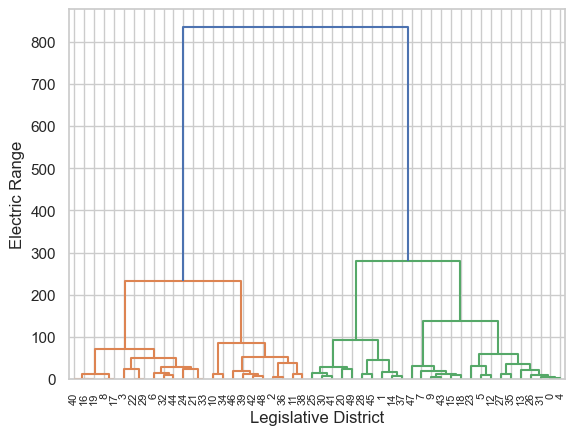

In [31]:
dendrogram = sch.dendrogram(sch.linkage(rd[['Electric Range','Legislative District']][0:50], method = 'ward'))
plt.xlabel('Legislative District')
plt.ylabel('Electric Range')
